## MIS780 Advanced AI For Business - Assignment 1 - T2 2021

**Student Name:** VAN HOANG NAM NGUYEN

**Student ID:** 219350314

# Input Data and Install Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###INSTALL gensim PACKAGES### 
!pip install gensim #Please install the latest version (4.0.1) to use pyLDAvis package
# !pip install  --upgrade  gensim 

In [ ]:
###INSTALL Cython PACKAGES###
!pip install Cython
# !pip install pyLDAvis

In [ ]:
###INSTALL OPERATORS###
import pandas as pd
import os
import numpy as np
import numpy

#install visualisation operators
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')
pd.set_option("display.max_colwidth", 200)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#install time operators
import datetime
from datetime import date
import calendar

#install text preprocessing and sentiment analysis operators 
import nltk 
from nltk import FreqDist
from itertools import chain
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
import re  #Regular expression operation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#install topic modelling operators 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
from gensim.models import CoherenceModel
import gensim.corpora as corpora


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780/Twitter_Data_VIC.csv',encoding= 'unicode_escape',parse_dates=["Tweet_Time"])
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780/Covid19_Cases_VIC.csv',parse_dates=["Date"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
twitter = df1.copy()
covid = df2.copy()

## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary
 

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

The Coronavirus pandemic has been influencing several countries in recent years. Australia is one of the nations taking actions against this global event with new public restrictions and policies enfored through its states. Under the supervision and support of Victoria Government, an analysis of 129,000 Twitter tweets in 2020 by Victoria-based Australian residents are conducted to provide some optimal recommendations in public policies and management strategies. 

This project returns results from data exploration with visualisation, sentiment analysis and topic modelling. Some highlighted findings are discussed at the end of each session. Overall, a dynamic discussion about Covid-19 topics occurs from July to October. More politcal leaders and govenment officials and the generic #auspol hashtag are mentioned in the tweets, especially Daniel Andrew with the most outstanding times with his supportive hashtag campaign #IStandWithDan (**_Section 2.Data exploration_**). However, according to **_Section 3.Sentiment Analysis_**, the negative sentiment is still prominent and accounted for approximately double the amount. This period also witnesses the increase of Covid cases and the negative tweets also increase.

Based on these findings, four recommendations are made to improve the situation better and increase the positivity and belief in people.


<a id = "cell_exploration"></a>
### 2. Data Exploration

In [ ]:
twitter.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,2020-10-02 05:00:54+00:00,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",-,0,0,<a href= http://twitter.com/download/iphone rel= nofollow >Twitter for iPhone</a>,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,-
1,O007paulchr,sydney australia,1.310000e+18,2020-09-27 06:32:09+00:00,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",-,0,0,<a href= http://twitter.com/download/iphone rel= nofollow >Twitter for iPhone</a>,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,-
2,O007paulchr,sydney australia,1.310000e+18,2020-09-16 08:32:13+00:00,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",-,0,0,<a href= http://twitter.com/download/iphone rel= nofollow >Twitter for iPhone</a>,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,-
3,O007paulchr,sydney australia,1.300000e+18,2020-09-06 05:45:36+00:00,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",-,0,0,<a href= http://twitter.com/download/iphone rel= nofollow >Twitter for iPhone</a>,@SkyNewsAust @DanielAndrewsMP,-
4,O007paulchr,sydney australia,1.300000e+18,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim who?,-,0,0,<a href= http://twitter.com/download/iphone rel= nofollow >Twitter for iPhone</a>,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,-


In [ ]:
covid.head()

,Date,VIC
0,2020-01-25,1
1,2020-01-26,0
2,2020-01-27,0
3,2020-01-28,0
4,2020-01-29,2


In [ ]:
# print info 
print("Shape of the Twitter df is {}.\n".format(twitter.shape))
print("** And dataframe info per below **\n")
print("Null count:", twitter.info(null_counts=True))
twitter['Tweet_Time'] = pd.to_datetime(twitter['Tweet_Time'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

# check NAs in each column
NA_count = twitter.isna().sum() 

# Percentage of NAs in each column
NA_percent = round((NA_count / len(twitter) * 100),2)
print(NA_percent)
print('\nThere are no columns having NAs ')

Shape of the Twitter df is (129395, 11).

** And dataframe info per below **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129395 entries, 0 to 129394
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   User_ID         129395 non-null  object             
 1   User_Location   129395 non-null  object             
 2   Tweet_ID        129395 non-null  float64            
 3   Tweet_Time      129395 non-null  datetime64[ns, UTC]
 4   Tweet_Text      129395 non-null  object             
 5   HashTag         129395 non-null  object             
 6   Retweet_Count   129395 non-null  object             
 7   Like_Count      129395 non-null  object             
 8   Source          129395 non-null  object             
 9   User_Mentioned  129395 non-null  object             
 10  Attachment_URL  129395 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
mem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

null_counts is deprecated. Use show_counts instead



**A. How many tweets were posted by month, by days of a week, and by hours of a day?**

In [ ]:
# Total tweets
print('Total tweets:', len(twitter.index), '\n')

#Tweets were posted by month
tweetbyM = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%B'))['Tweet_Text'].count()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
tweetbyM = tweetbyM.reindex(month, axis=0)
tweetbyM
print(tweetbyM)

#Tweets were posted by days of a week
tweetbyD = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%A'))['Tweet_Text'].count()
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tweetbyD = tweetbyD.reindex(day, axis=0)
print(tweetbyD)

#Tweets were posted by hour
tweetbyH = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%H'))['Tweet_Text'].count().sort_index()
print(tweetbyH)

Total tweets: 129395 

Tweet_Time
January       1248
February       703
March         3629
April         3427
May           5793
June          6377
July         18184
August       25493
September    41442
October      23099
Name: Tweet_Text, dtype: int64
Tweet_Time
Monday       20049
Tuesday      20234
Wednesday    18274
Thursday     16952
Friday       15009
Saturday     16024
Sunday       22853
Name: Tweet_Text, dtype: int64
Tweet_Time
00    7430
01    8921
02    9571
03    8836
04    7279
05    7496
06    7650
07    7624
08    7882
09    8025
10    7951
11    7141
12    6000
13    3639
14    1745
15     846
16     524
17     407
18     440
19     847
20    1972
21    4136
22    6177
23    6856
Name: Tweet_Text, dtype: int64


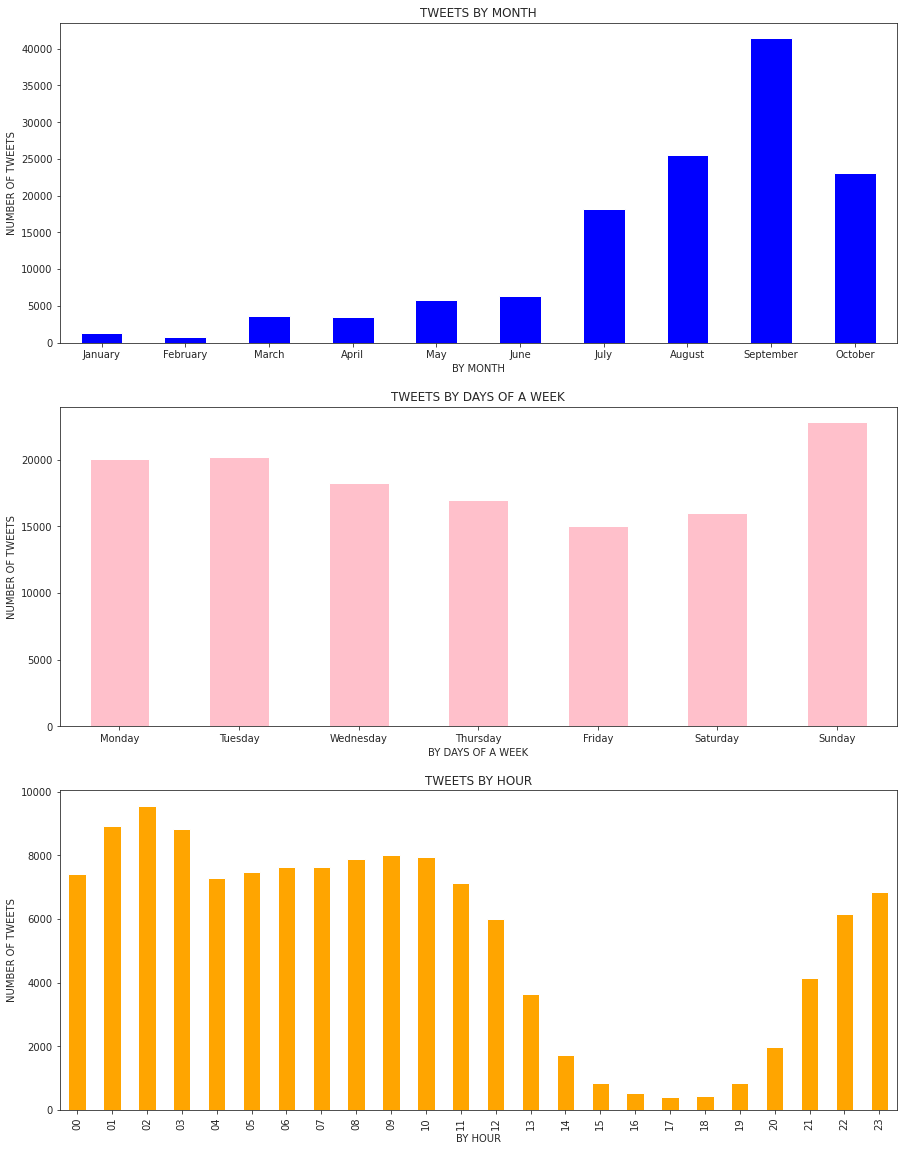

In [ ]:
#Plot
fig, axs = plt.subplots(3,1)
tweetbyM.plot(kind='bar',figsize=(15, 20),ax=axs[0],xlabel = "BY MONTH", ylabel = "NUMBER OF TWEETS", rot = 0, title = "TWEETS BY MONTH",color="blue")
tweetbyD.plot(kind='bar',figsize=(15, 20),ax=axs[1],xlabel = "BY DAYS OF A WEEK", ylabel = "NUMBER OF TWEETS", rot = 0, title = "TWEETS BY DAYS OF A WEEK",color="pink")
tweetbyH.plot(kind='bar',figsize=(15, 20),ax=axs[2],xlabel = "BY HOUR", ylabel = "NUMBER OF TWEETS", title = "TWEETS BY HOUR",color="orange")

**B. What are the (top 10) most popular Hashtags? How did the popularities of those hashtags change according to time (e.g., by month)?**

In [ ]:
#####PREPRAING DATAFRAME####
#New dataframe with only two attributes "Tweet_Time" and "HashTag"
dfB = twitter[['Tweet_Time', 'HashTag']].copy()
dfB.Tweet_Time = dfB.Tweet_Time.dt.month

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfB.HashTag.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfB = pd.DataFrame({'Tweet_Time': np.repeat(dfB['Tweet_Time'], lens),
                    'HashTag': chainer(dfB['HashTag'])})

#data cleaning: remove values don't have "#"
dfB = dfB[dfB.HashTag.str.contains("#")] 
dfB

,Tweet_Time,HashTag
16,9,#IStandWithDanAndrews
16,9,#IStandWithDan
16,9,#fucktheheraldsun
23,8,#CoateInquiry
23,8,#PAEC
...,...,...
114970,8,#doyouthinkwearestupid
114970,8,#resignnowdan
114970,8,#COVID19Victoria
114972,9,#DictatorDan


The top 10 most popular Hashtags are 

                  WORDS  COUNT
0               #auspol   1915
1        #IStandWithDan   1784
2           #COVID19Vic   1402
3             #springst   1253
4              #COVID19    674
5          #DictatorDan    582
6           #COVID19Aus    416
7      #COVID19Victoria    366
8               #vicpol    344
9  #ResignDanielAndrews    316


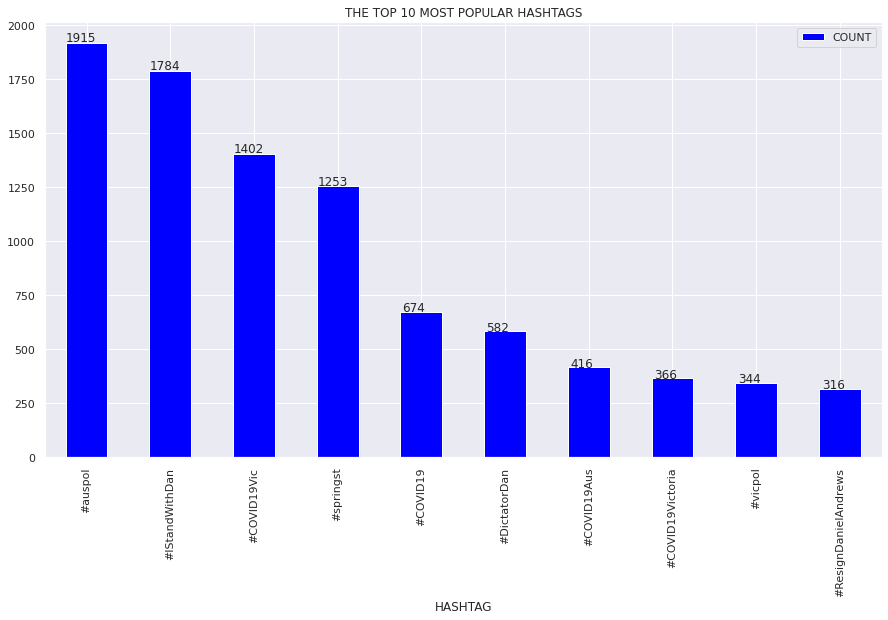

In [ ]:
###TOP 10 MOST POPULAR HASHTAGS###
Top10 = FreqDist(dfB.HashTag).most_common(10)
Top10 = pd.DataFrame(Top10,columns=['WORDS', 'COUNT'])
print("The top 10 most popular Hashtags are \n")
print(Top10)
#plot data
sns.set(rc={'figure.figsize':(20,10)})
ax = Top10.plot(kind = "bar", xlabel = "HASHTAG", title = "THE TOP 10 MOST POPULAR HASHTAGS", x = "WORDS", y = "COUNT",figsize=(15, 8),color = 'blue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

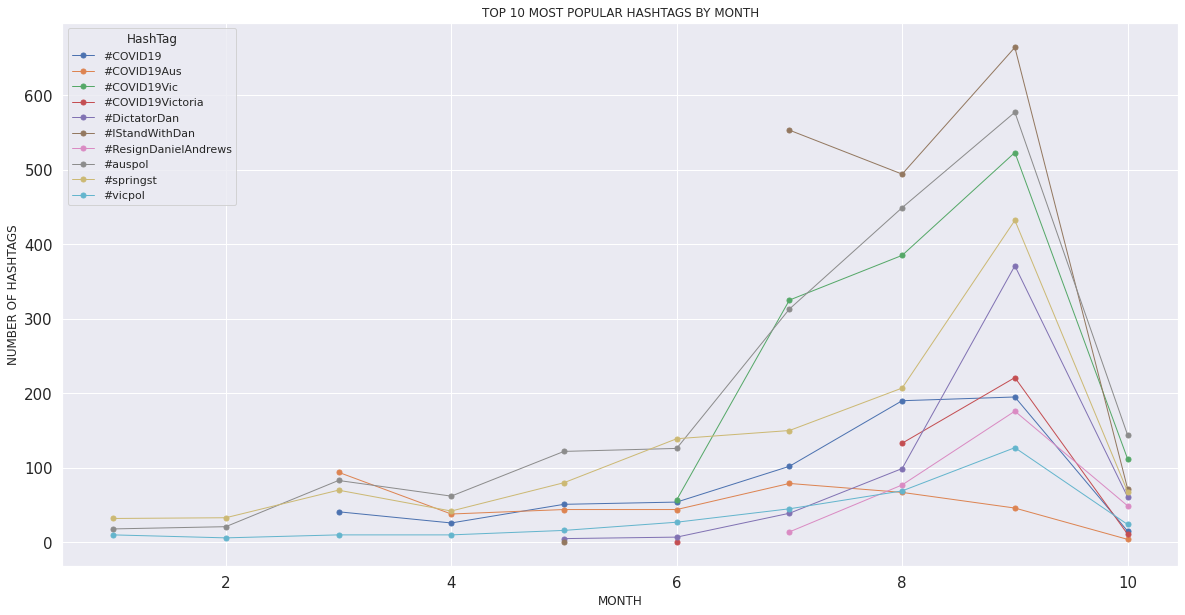

In [ ]:
###TOP 10 MOST POPULAR HASHTAGS BY MONTH###
dfBbyM = dfB[dfB.HashTag.isin(['#auspol', '#IStandWithDan','#COVID19Vic', '#springst','#COVID19','#DictatorDan','#COVID19Aus','#COVID19Victoria','#vicpol','#ResignDanielAndrews'])].copy()
dfBbyM['Counts'] = np.zeros(len(dfBbyM))

# plot all hashtags 
fig, ax = plt.subplots(figsize=(20,10))
dfBbyM.groupby(['Tweet_Time','HashTag']).count()['Counts'].unstack().plot(ax=ax,marker='o', title ='TOP 10 MOST POPULAR HASHTAGS BY MONTH', xlabel ="MONTH", ylabel = 'NUMBER OF HASHTAGS', linewidth=1, markersize=5,fontsize =15)


**C. What are the (top 10) most popular Twitter’s user account mentioned in the public tweets? Among those Twitter accounts, which accounts belongs to political leaders/government officials? (Hint: visit their official twitter accounts to identify their job title/role)**

In [ ]:
dfC =  twitter[['Tweet_Text', 'User_Mentioned']].copy()
dfC = dfC[dfC.User_Mentioned.str.contains('@')]

def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfC.User_Mentioned.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfC = pd.DataFrame({'Tweet_Text': np.repeat(dfC['Tweet_Text'], lens),
                    'User_Mentioned': chainer(dfC['User_Mentioned'])})

dfC =dfC[dfC.User_Mentioned.str.contains('@')]
dfC

,Tweet_Text,User_Mentioned
0,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",@SkyNewsAust
0,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",@AnnastaciaMP
0,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",@DanielAndrewsMP
1,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",@SkyNewsAust
1,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",@DanielAndrewsMP
...,...,...
114976,"@TomSouthern15 @DanielAndrewsMP Yep, luckily for us Victorians we had Dan s hotel quarantine program or else we might have had pretty much close to zero cases like all the other states. Good logic!",@DanielAndrewsMP
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @tiger11104158 Throw the 9 in for the quinella,@scorcherzz
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @tiger11104158 Throw the 9 in for the quinella,@DanielAndrewsMP
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @tiger11104158 Throw the 9 in for the quinella,@jamiejanides


The top 10 most popular Twitter accounts are 

           ACCOUNTS   COUNT
0  @DanielAndrewsMP  110234
1      @SkyNewsAust    6795
2  @ScottMorrisonMP    5117
3     @VictorianCHO    4180
4     @JennyMikakos    2481
5      @newbury3186    2326
6       @TimSmithMP    2254
7  @michaelobrienmp    1934
8      @rwillingham    1706
9  @rachelbaxendale    1644


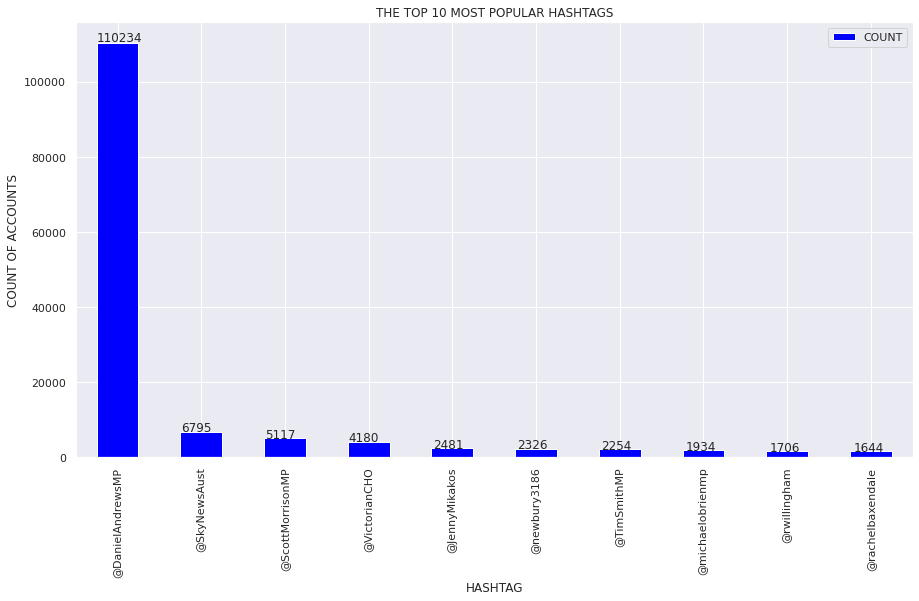

In [ ]:
# Top10account = FreqDist(dfC.User_account).most_common(10) 
Top10account = FreqDist(dfC.User_Mentioned).most_common(10)
Top10account = pd.DataFrame(Top10account,columns=['ACCOUNTS', 'COUNT'])
print("The top 10 most popular Twitter accounts are \n")
print(Top10account)

#plot data: Top 10 most popular Twitter's mentioned user account
axC = Top10account.plot(kind = "bar", xlabel = "HASHTAG", title = "THE TOP 10 MOST POPULAR HASHTAGS",ylabel='COUNT OF ACCOUNTS', x = "ACCOUNTS", y = "COUNT",figsize=(15, 8), color = 'blue')
for p in axC.patches:
    axC.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [ ]:
###accounts belongs to politcal leaders/government officials###
# Check string contains these elements 
mylist = ['MP', 'mp', 'CHO','@newbury3186']
pattern = '|'.join(mylist)
PG = Top10account[Top10account.ACCOUNTS.str.contains(pattern)] 
PG
print('After skimming random accounts, we can find that those account having title of political leaders/governement officials includes "MP" or "CHO" at the end of  the account')
print('\nAccounts belongs to politcal leaders/government officials are \n')
print(PG)

After skimming random accounts, we can find that those account having title of political leaders/governement officials includes "MP" or "CHO" at the end of  the account

Accounts belongs to politcal leaders/government officials are 

           ACCOUNTS   COUNT
0  @DanielAndrewsMP  110234
2  @ScottMorrisonMP    5117
3     @VictorianCHO    4180
5      @newbury3186    2326
6       @TimSmithMP    2254
7  @michaelobrienmp    1934


**Findings discovered from section 2 data exploration are:**
*   Tweets surge from July to October.
*   Over 15000 tweets are posted everyday.
*   September is the peak period which has the most number of tweets posted.
*   Sunday is the peak time of posting tweets.
*   The highest amount of engagement occurs from 1am to 3am.
*   The top 3 most popular hashtags are #auspol, #IStandWithDan, #Covid19Victoria with over 1000 hashtags. Anti-Andrews with the hashtag #DictatorDan are at the rank#6 with nearly 600 times. This indicates that more supporters than anti-Tweeters.
*   All the popular hashtags are dropped to less than 200 hashtags in October.
*   Daniel Andrews is the most mentioned account with over 110,000 times.
*   6 out of 10 most popular mentioned accounts are political leaders or government officials.

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

**D. What are public sentiments expressed toward the popularly mentioned political leaders/government officials?**

In [ ]:
###CREATE NEW DATAFRAME ####
dfDE = twitter[['Tweet_Time','User_Mentioned','Tweet_Text',]].copy()
dfDE['Month'] = dfDE.Tweet_Time.dt.month
dfDE

,Tweet_Time,User_Mentioned,Tweet_Text,Month
0,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",10
1,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",9
2,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",9
3,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",9
4,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim who?,9
...,...,...,...,...
129390,2020-10-06 17:39:52+00:00,-,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always ,10
129391,2020-10-06 17:24:34+00:00,-,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,10
129392,2020-10-06 16:59:58+00:00,-,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,10
129393,2020-10-06 16:55:00+00:00,-,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,10


In [ ]:
####Calculate the sentiment####
dfsen = dfDE
analyzer = SentimentIntensityAnalyzer() 
dfsen['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dfsen.Tweet_Text]
dfsen['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dfsen.Tweet_Text]
dfsen['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dfsen.Tweet_Text]
dfsen['compound'] = [analyzer.polarity_scores(x)['compound'] for x in dfsen.Tweet_Text]
dfsen['rating'] = np.where(dfsen['compound']>= 0.2, 'Positive', 'Negative')
dfsen

,Tweet_Time,User_Mentioned,Tweet_Text,Month,neg,neu,pos,compound,rating
0,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",10,0.370,0.630,0.000,-0.5719,Negative
1,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",9,0.239,0.699,0.062,-0.7783,Negative
2,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",9,0.000,0.784,0.216,0.5106,Positive
3,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",9,0.227,0.773,0.000,-0.6124,Negative
4,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim who?,9,0.000,1.000,0.000,0.0000,Negative
...,...,...,...,...,...,...,...,...,...
129390,2020-10-06 17:39:52+00:00,-,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always ,10,0.108,0.666,0.226,0.6757,Positive
129391,2020-10-06 17:24:34+00:00,-,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,10,0.197,0.678,0.125,-0.3384,Negative
129392,2020-10-06 16:59:58+00:00,-,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,10,0.167,0.833,0.000,-0.1531,Negative
129393,2020-10-06 16:55:00+00:00,-,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,10,0.362,0.510,0.128,-0.6808,Negative


In [ ]:
#####Split to individual account#####
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfsen.User_Mentioned.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfD = pd.DataFrame({'User_account': chainer(dfsen['User_Mentioned']),
                    'Tweet_Text': np.repeat(dfsen['Tweet_Text'], lens),
                    'sentiment': np.repeat(dfsen['rating'],lens),
                    'compound': np.repeat(dfsen['compound'],lens),
                    'neg': np.repeat(dfsen['neg'],lens),
                    'neu': np.repeat(dfsen['neu'],lens),
                    'pos': np.repeat(dfsen['pos'],lens)})

mylist = ['@DanielAndrewsMP', '@ScottMorrisonMP', '@VictorianCHO', 'newbury3186', '@TimSmithMP', '@michaelobrienmp']
pattern = '|'.join(mylist)
dfD = dfD[dfD.User_account.str.contains(pattern)] 
print('\nTwitter Post by the popularly mentioned political leaders/government officials are \n')
dfD 


Twitter Post by the popularly mentioned political leaders/government officials are 



,User_account,Tweet_Text,sentiment,compound,neg,neu,pos
0,@DanielAndrewsMP,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",Negative,-0.5719,0.370,0.630,0.000
1,@DanielAndrewsMP,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",Negative,-0.7783,0.239,0.699,0.062
2,@michaelobrienmp,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",Positive,0.5106,0.000,0.784,0.216
2,@DanielAndrewsMP,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",Positive,0.5106,0.000,0.784,0.216
3,@DanielAndrewsMP,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",Negative,-0.6124,0.227,0.773,0.000
...,...,...,...,...,...,...,...
114973,@DanielAndrewsMP,"@DanielAndrewsMP \nYou have led a sham government that was more worried about their own cushy publicly funded jobs, rather than protecting vulnerable Victorians. That was your primary responsibili...",Negative,-0.9245,0.304,0.696,0.000
114974,@DanielAndrewsMP,"@DanielAndrewsMP \nHi Dan,\nI live in outer east and no power for nearly 2 days now, SP Ausnet say it could take a week. Feels like I m living in a 3rd world country. No power. No clean drinking w...",Positive,0.4215,0.120,0.727,0.153
114975,@DanielAndrewsMP,@DanielAndrewsMP @JennyMikakos \nStuck in our police state and locked down like prisoners 23 hours a day. How do you sleep at night? How dare you not take responsibility for your lethal incompeten...,Negative,-0.7707,0.201,0.744,0.055
114976,@DanielAndrewsMP,"@TomSouthern15 @DanielAndrewsMP Yep, luckily for us Victorians we had Dan s hotel quarantine program or else we might have had pretty much close to zero cases like all the other states. Good logic!",Positive,0.9245,0.000,0.652,0.348


In [ ]:
#####Public sentiments expressed toward the popularly mentioned political leaders/government officials#####
dfDgroup = dfD[['User_account','sentiment']].copy()
dfDgroup['Counts'] = np.zeros(len(dfDgroup))
UnstackeddfDgroup = dfDgroup.groupby(['sentiment','User_account']).count()['Counts'].unstack(level=0)
print('USER ACCOUNTS COUNT BY SENTIMENT \n')
UnstackeddfDgroup

USER ACCOUNTS COUNT BY SENTIMENT 



sentiment,Negative,Positive
User_account,,
@DanielAndrewsMP,69777,40457
@ScottMorrisonMP,3273,1844
@TimSmithMP,1501,753
@VictorianCHO,2439,1741
@michaelobrienmp,1271,663
@newbury3186,1544,782


**E. How did the overall public sentiments change in relation to the Covid-19 cases in Victoria? Does the increase/decrease in the number of COVID-19 influence public sentiments?**

In [ ]:
#Prepare Covid dataframe 
covid['Month'] = pd.to_datetime(covid['Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
covid['Month'] = covid.Date.dt.month
dfEcovid = covid[['Month','VIC']].copy()
dfEcovid = dfEcovid.groupby('Month')['VIC'].sum()

#Prepare Sentiment dataframe 
dfESen = dfsen[['Month','rating']].copy()
dfESen['Count'] = np.zeros(len(dfESen))
dfESen = dfESen.groupby(['rating','Month']).count()['Count'].unstack(level=0)

#Merge two dataframe by Month
dfE = pd.merge(left = dfESen, right = dfEcovid, how ="left", left_on = 'Month', right_on='Month')
dfE

,Negative,Positive,VIC
Month,,,
1,746,502,3
2,459,244,4
3,2150,1479,910
4,1976,1451,444
5,3510,2283,288
6,4257,2120,510
7,11400,6784,8418
8,16361,9132,8503
9,26411,15031,1089


In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
#fig = px.line(x=month, y=covid_month['VIC'], color=px.Constant("Covid case"),labels=dict(x="Month", y="Time", color=""))
fig.add_trace(
    go.Scatter(x=month, y=dfE['VIC'], name="Covidcase"),
    secondary_y=True,)

fig.add_bar(x=month, y=dfE['Negative'], name="Negative Tweet")
fig.add_bar(x=month, y=dfE['Positive'], name="Positive Tweet")

fig.update_layout(
    title_text="The overall public sentiments change in relation to the Covid-19 cases in Victoria"
)


fig.update_xaxes(title_text="Month")

# Set y-axes titles
fig.update_yaxes(title_text="Number of tweets", secondary_y=False)
fig.update_yaxes(title_text="Number of cases", secondary_y=True)

fig.show()

**From sentiment analysis:**
*   In general, these leaders receive more negative tweets, nearly double the positive tweets.
*   Because Daniel Andrews is the public face of the state so he receives the most  criticism among leaders for the Covid-19 infections, deaths or ineffective strategies and so on.
*   Tweets related to Covid-19 increase when Covid cases surge from July to September.
*   The highest number of cases is in August (over 8000 cases). The peak number of negative tweets is in September while this month has the Covid cases decreased. There are hypothesis behind this negativity. There could be objections about some public policies or restrictions such as lockdowns and border closures or people feel the negative impacts on their economy.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

In [ ]:
dfFG = twitter[['Tweet_Time','Tweet_Text']].copy() 
dfFG['Tweet_Time'] = dfFG.Tweet_Time.dt.month
dfFG

,Tweet_Time,Tweet_Text
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious."
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual."
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge."
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are."
4,9,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim who?
...,...,...
129390,10,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always 
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.


In [ ]:
documents = dfFG['Tweet_Text']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        # removing everything except alphabets
        tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
        tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
        tweet = re.sub(r'(https?)\S+', '', tweet)
        tweet = re.sub('[^A-Za-z]', ' ', tweet)
        # make all text lowercase
        tweet = tweet.lower()
        # apply tokenization
        Tokens = tweet.split()
        # apply stemming operation (Optional)
        #for t in range(len(Tokens)):
        #    Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        tweet = ' '.join(Filtered_token)        
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(tweet)  

# Add to dfFG
dfFG['Clean'] = np.array(Cleaned_doc)

# Drop blank rows
nan_value = float("NaN")
dfFG.replace("", nan_value, inplace=True)
dfFG.dropna(subset = ["Clean"], inplace=True)
dfFG

,Tweet_Time,Tweet_Text,Clean
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",what stupid statement serious
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",what would have done rita quick jump andrews solutions alternatives pathetic lineral commentary usual
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",what load luckily michael brien wasn charge
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",peta comments current liberal federal government what waste space
5,8,@SkyNewsAust @DanielAndrewsMP Im interested to know who Paul Murray is recommending to lead the State and do everything sky news expects of that person.,interested know paul murray recommending lead state everything news expects that person
...,...,...,...
129390,10,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always ,didn dismissed shut down sentence ignored great today always
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,ratchet empathy heart fake cause that while sentencing ignorant such times doing wonderful seen nurses doctors dancing
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,buck stops with
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,doesn their narrative blaming every death


In [ ]:
# Remove stop words
stop = set(stopwords.words('english'))
newStopWordsList = ['know','dont','please','yeah','others','make','track','thanks','damn','sure','tell','take','remember','sorry','bring','watch',
                'hold','forget','want','continue','look','think','sound','glad','front','reckon','shut','start','hell','thank','come','guess','till',
                'everyone','nothing','anything','someone','thing','towards','hear','throw','keep' ,'spent','gotcha','bullshit','dear','hide','come',
                'wait','stay','interested','expects','dismissed','ignored','stops','stop','looks','like','youre','wonderful','seen','thinks','amount',
                'blame','part','cause','afternoon','self','well','words','journos','issues','joke','person','spread','party','walk','opinion','trolls',
                'calm','proud','note','comments','step','mate','whats','right','quote','term','ones','princess','thousands','year','months','hour','gladys',
                'find','facts','comment','opinions','drive','shows','name','apologise','yesterday','pity','understand','incompetent','football','dhhs','part',
                'fools','footy','words','part','comrade','find','finds','everything','bloody','well','delivers','fine','data','person','walk','anyone','feds',
                'deserve','imagine','crap','stuff','fool','days','idiots','admit','moron','something','believe','matters','tells','cause','times','protect',
                'feels','curve','site','move','attack','morning','keeps','hours','tonight','learn','speak','spin','share','week','read','weeks','wish','hope',
                'wonder','absolute','summer','love','sounds','night','explain','fuck', 'cant','knows','that','thats','create','concern','retweet','lots','let',
                'lets','start','starts','compare','compares','become','becomes','line','lines','shit','numbers','forget','forgets','done','current','dont']   
newStopWords = stop.union(newStopWordsList)
dfFG['Clean'] = dfFG['Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopWords)]))

# Tokenize
dfFG['Tokenize'] = dfFG['Clean'].apply(lambda x: word_tokenize(x))

# Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    filtered = [word for word,pos in pos_tagged_text if (pos == 'NN'or pos == 'NNS')] #or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
    return filtered

dfFG['Pos_tag'] = dfFG['Tokenize'].apply(lambda x: word_pos_tagger(x))
dfFG

,Tweet_Time,Tweet_Text,Clean,Tokenize,Pos_tag
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",stupid statement serious,"[stupid, statement, serious]",[statement]
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",would rita quick jump andrews solutions alternatives pathetic lineral commentary usual,"[would, rita, quick, jump, andrews, solutions, alternatives, pathetic, lineral, commentary, usual]","[jump, andrews, solutions, alternatives, commentary]"
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",load luckily michael brien charge,"[load, luckily, michael, brien, charge]","[load, charge]"
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",peta liberal federal government waste space,"[peta, liberal, federal, government, waste, space]","[government, waste, space]"
5,8,@SkyNewsAust @DanielAndrewsMP Im interested to know who Paul Murray is recommending to lead the State and do everything sky news expects of that person.,paul murray recommending lead state news,"[paul, murray, recommending, lead, state, news]","[paul, murray, state, news]"
...,...,...,...,...,...
129390,10,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always ,sentence great today always,"[sentence, great, today, always]","[sentence, today]"
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,ratchet empathy heart fake sentencing ignorant nurses doctors dancing,"[ratchet, empathy, heart, fake, sentencing, ignorant, nurses, doctors, dancing]","[ratchet, heart, nurses, doctors]"
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,buck,[buck],[buck]
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,narrative blaming every death,"[narrative, blaming, every, death]","[blaming, death]"


In [ ]:
#Transform data
dfFG['Pos_tag'] = dfFG['Pos_tag'].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
dfFG

,Tweet_Time,Tweet_Text,Clean,Tokenize,Pos_tag
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",stupid statement serious,"[stupid, statement, serious]",statement
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",would rita quick jump andrews solutions alternatives pathetic lineral commentary usual,"[would, rita, quick, jump, andrews, solutions, alternatives, pathetic, lineral, commentary, usual]","jump,andrews,solutions,alternatives,commentary"
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",load luckily michael brien charge,"[load, luckily, michael, brien, charge]","load,charge"
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",peta liberal federal government waste space,"[peta, liberal, federal, government, waste, space]","government,waste,space"
5,8,@SkyNewsAust @DanielAndrewsMP Im interested to know who Paul Murray is recommending to lead the State and do everything sky news expects of that person.,paul murray recommending lead state news,"[paul, murray, recommending, lead, state, news]","paul,murray,state,news"
...,...,...,...,...,...
129390,10,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always ,sentence great today always,"[sentence, great, today, always]","sentence,today"
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,ratchet empathy heart fake sentencing ignorant nurses doctors dancing,"[ratchet, empathy, heart, fake, sentencing, ignorant, nurses, doctors, dancing]","ratchet,heart,nurses,doctors"
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,buck,[buck],buck
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,narrative blaming every death,"[narrative, blaming, every, death]","blaming,death"


In [ ]:
vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

A = vectorizer.fit_transform(dfFG['Pos_tag'])
A.shape # check shape of the document-term matrix

(124522, 1000)

In [ ]:
count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(dfFG['Pos_tag'])
count_data

<124522x23395 sparse matrix of type '<class 'numpy.int64'>'
	with 519813 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



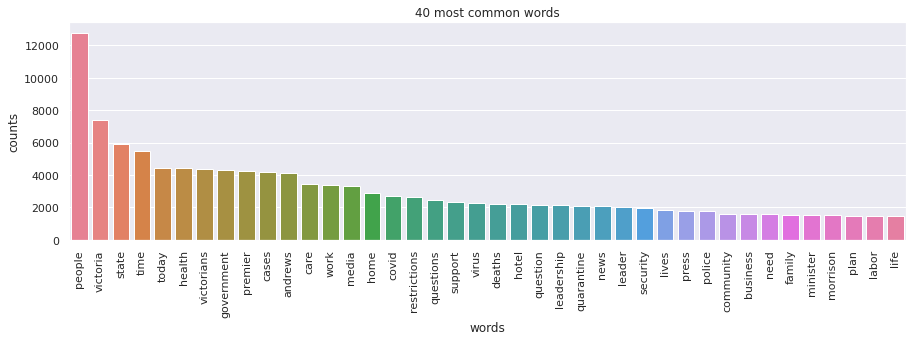

In [ ]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 4400 and total_counts[t] > 100:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  845


<124522x845 sparse matrix of type '<class 'numpy.int64'>'
	with 314590 stored elements in Compressed Sparse Row format>

In [ ]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(dfFG['Clean'].tolist())):
    each_item = []
    for t in dfFG['Clean'].tolist()[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 
    # print(Cleaned_doc_new[r])

# Add to dfFG
dfFG['Clean_new'] = np.array(Cleaned_doc_new)

CLEANED TEXT NEW: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
####Remove Na values ###
#Create new column 
dfFG['Clean_removed'] = dfFG['Clean_new'].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
#Drop blank rows 
nan_value = float("NaN")
dfFG.replace("", nan_value, inplace=True)
dfFG.dropna(subset = ["Clean_removed"], inplace=True)
dfFG = dfFG[['Tweet_Time','Tweet_Text','Clean','Tokenize','Pos_tag','Clean_new']].copy() 
dfFG 

,Tweet_Time,Tweet_Text,Clean,Tokenize,Pos_tag,Clean_new
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious.",stupid statement serious,"[stupid, statement, serious]",statement,[statement]
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.",would rita quick jump andrews solutions alternatives pathetic lineral commentary usual,"[would, rita, quick, jump, andrews, solutions, alternatives, pathetic, lineral, commentary, usual]","jump,andrews,solutions,alternatives,commentary",[andrews]
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge.",load luckily michael brien charge,"[load, luckily, michael, brien, charge]","load,charge","[load, michael, brien, charge]"
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are.",peta liberal federal government waste space,"[peta, liberal, federal, government, waste, space]","government,waste,space","[peta, government, waste, space]"
5,8,@SkyNewsAust @DanielAndrewsMP Im interested to know who Paul Murray is recommending to lead the State and do everything sky news expects of that person.,paul murray recommending lead state news,"[paul, murray, recommending, lead, state, news]","paul,murray,state,news","[paul, murray, lead, news]"
...,...,...,...,...,...,...
129389,10,@DanielAndrewsMP Remove restrictions on essential health services. You open meat works and construction and schools. Stop all these rules on primary care medical and allied health.,remove restrictions essential health services open meat works construction schools rules primary care medical allied health,"[remove, restrictions, essential, health, services, open, meat, works, construction, schools, rules, primary, care, medical, allied, health]","restrictions,health,services,meat,construction,schools,rules,care,health","[restrictions, services, works, construction, schools, rules, care]"
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...,ratchet empathy heart fake sentencing ignorant nurses doctors dancing,"[ratchet, empathy, heart, fake, sentencing, ignorant, nurses, doctors, dancing]","ratchet,heart,nurses,doctors","[heart, nurses, doctors]"
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe,buck,[buck],buck,[buck]
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.,narrative blaming every death,"[narrative, blaming, every, death]","blaming,death",[death]


In [ ]:
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(dfFG['Clean_new'].tolist())
print(id2word.token2id)

{'statement': 0, 'andrews': 1, 'brien': 2, 'charge': 3, 'load': 4, 'michael': 5, 'government': 6, 'peta': 7, 'space': 8, 'waste': 9, 'lead': 10, 'murray': 11, 'news': 12, 'paul': 13, 'idiot': 14, 'chris': 15, 'daniel': 16, 'point': 17, 'credibility': 18, 'pandemic': 19, 'making': 20, 'leader': 21, 'need': 22, 'fault': 23, 'crisis': 24, 'business': 25, 'disgrace': 26, 'families': 27, 'incompetence': 28, 'police': 29, 'protest': 30, 'restaurants': 31, 'standard': 32, 'answers': 33, 'inquiry': 34, 'commission': 35, 'conference': 36, 'housing': 37, 'press': 38, 'interview': 39, 'contact': 40, 'face': 41, 'home': 42, 'lives': 43, 'partner': 44, 'visit': 45, 'building': 46, 'class': 47, 'community': 48, 'cops': 49, 'difference': 50, 'kind': 51, 'response': 52, 'premier': 53, 'trains': 54, 'years': 55, 'journalists': 56, 'women': 57, 'messages': 58, 'standards': 59, 'holidays': 60, 'labor': 61, 'school': 62, 'cedar': 63, 'meats': 64, 'melb': 65, 'care': 66, 'record': 67, 'resign': 68, 'sick':

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in dfFG['Clean_new'].tolist()]
print(Corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Gensim LDA Model**

In [ ]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(25,105,5))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number {0} -- Coherence: {1}'.format(top,round(coherence, 4)))

Topic Number 25 -- Coherence: 0.3356
Topic Number 30 -- Coherence: 0.3847
Topic Number 35 -- Coherence: 0.4174
Topic Number 40 -- Coherence: 0.4289
Topic Number 45 -- Coherence: 0.3994
Topic Number 50 -- Coherence: 0.3715
Topic Number 55 -- Coherence: 0.3478
Topic Number 60 -- Coherence: 0.338
Topic Number 65 -- Coherence: 0.3291
Topic Number 70 -- Coherence: 0.3145
Topic Number 75 -- Coherence: 0.2905
Topic Number 80 -- Coherence: 0.2893
Topic Number 85 -- Coherence: 0.2803
Topic Number 90 -- Coherence: 0.2666
Topic Number 95 -- Coherence: 0.2782
Topic Number 100 -- Coherence: 0.2733


Text(0, 0.5, 'Coherence')

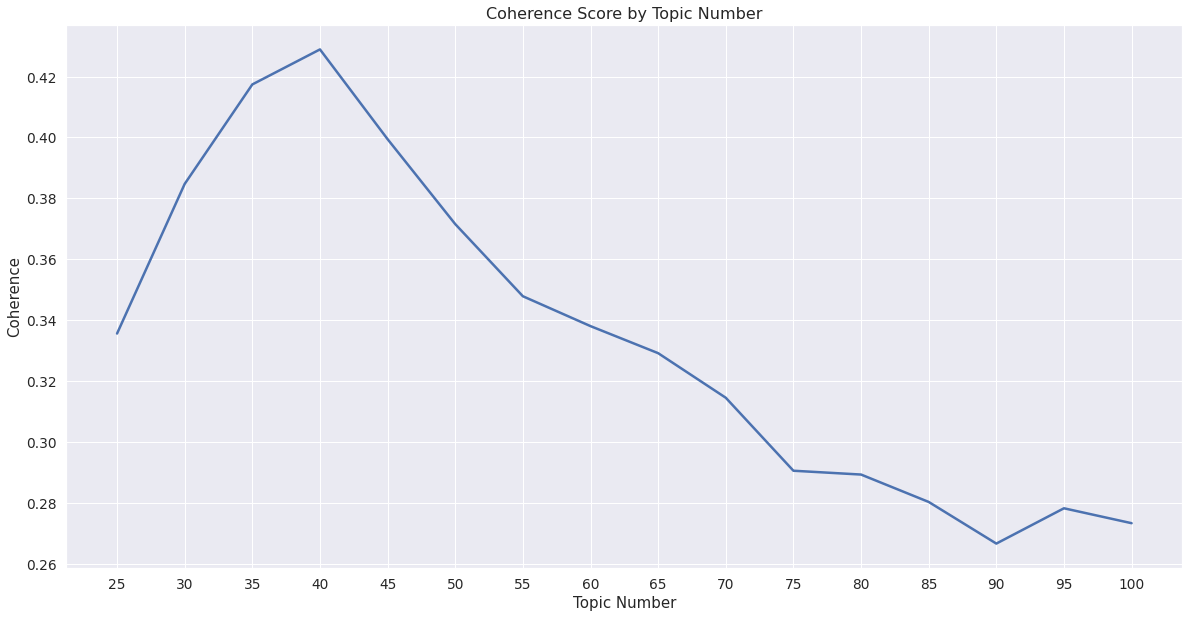

In [ ]:
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

In [ ]:
###TOPICS RELATING TO COVID-19 SITUATIONS AND/OR GOVERNMENT RESPONDSES WERE THE DISCUSSSED IN THE TWEETS###

lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
print('\n✨Topics relating to COVID-19 situations and/or government responses were the discussed in the tweets✨')
lda_model.show_topics(num_topics=40,num_words=10,formatted=True)


# for idx, topic in lda_model.show_topics(formatted=False, num_words= 10,num_topics = 44):
#     print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))


✨Topics relating to COVID-19 situations and/or government responses were the discussed in the tweets✨


[(0,
  '0.255*"lockdown" + 0.173*"support" + 0.084*"show" + 0.070*"mean" + 0.052*"decisions" + 0.050*"break" + 0.040*"bill" + 0.035*"information" + 0.029*"friend" + 0.025*"date"'),
 (1,
  '0.182*"rules" + 0.125*"contact" + 0.113*"family" + 0.076*"team" + 0.057*"matter" + 0.053*"fair" + 0.045*"friends" + 0.043*"past" + 0.039*"game" + 0.036*"chairman"'),
 (2,
  '0.318*"care" + 0.119*"change" + 0.068*"workers" + 0.062*"lock" + 0.055*"answers" + 0.049*"story" + 0.044*"level" + 0.035*"outbreaks" + 0.026*"eyes" + 0.025*"individuals"'),
 (3,
  '0.134*"response" + 0.084*"shame" + 0.067*"measures" + 0.066*"disaster" + 0.055*"governments" + 0.054*"tomorrow" + 0.051*"failure" + 0.049*"freedom" + 0.044*"whilst" + 0.038*"parents"'),
 (4,
  '0.458*"victorians" + 0.093*"election" + 0.064*"majority" + 0.050*"failures" + 0.034*"approach" + 0.030*"happens" + 0.029*"seat" + 0.025*"hospitals" + 0.022*"blow" + 0.021*"hang"'),
 (5,
  '0.125*"country" + 0.121*"money" + 0.090*"strategy" + 0.084*"staff" + 0.06

In [ ]:
###INSTALL Cython AND pyLDAvis PACKAGES###
# !pip install Cython
!pip install pyLDAvis
###Visualize topics-keywords of LDA###
# To plot at Jupyter notebook
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim_models.prepare(lda_model, Corpus, dictionary= id2word)
# Save pyLDA plot as html file
pyLDAvis.save_html(plot, 'LDA_NYT.html')
plot

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
32     0.284017 -0.067164       1        1  3.743885
0     -0.022607  0.077197       2        1  3.430176
37    -0.006458  0.027664       3        1  3.216163
39    -0.010235  0.041137       4        1  3.083944
30    -0.024605  0.033469       5        1  3.080650
18    -0.099054 -0.214867       6        1  3.074554
28    -0.014099  0.021724       7        1  2.927200
15    -0.089857 -0.036252       8        1  2.916522
9     -0.022769  0.087366       9        1  2.820992
31     0.103856 -0.049446      10        1  2.758938
29    -0.044735  0.092560      11        1  2.741111
12    -0.101922 -0.154139      12        1  2.720047
1      0.015752  0.041042      13        1  2.702408
20     0.122570 -0.039761      14        1  2.668304
22     0.020923  0.007394      15        1  2.651987
4     -0.009771 -0.000791      16        1  2.604299
8     -0.081424 -0.189962      17        1  2.578046
2     -0.042851  0.063008      18        1  2.553031
13    -0.055864  0.009503      19        1  2.486251
38     0.173776 -0.025100      20        1  2.414394
10    -0.015526  0.048581      21        1  2.405657
6      0.002445  0.071936      22        1  2.404638
26    -0.035694  0.052290      23        1  2.396159
11    -0.019215  0.009842      24        1  2.385587
27     0.029140  0.022281      25        1  2.382880
7     -0.122368 -0.254534      26        1  2.369090
3     -0.012481  0.059941      27        1  2.348238
19     0.324889 -0.091575      28        1  2.292081
14     0.001386  0.050935      29        1  2.266538
5     -0.020932  0.043705      30        1  2.227181
36    -0.032803  0.065858      31        1  2.202072
35    -0.052360  0.007308      32        1  2.164988
21     0.013433  0.090452      33        1  2.118589
25    -0.025275  0.045706      34        1  2.094705
24    -0.018882  0.051325      35        1  2.038658
23     0.015256 -0.151988      36        1  2.012208
34    -0.067327 -0.013936      37        1  1.868296
16    -0.014193  0.055812      38        1  1.708726
17    -0.023849  0.049748      39        1  1.620159
33    -0.020288  0.061730      40        1  1.520647, topic_info=           Term         Freq        Total Category  logprob  loglift
1       andrews  5307.000000  5307.000000  Default  30.0000  30.0000
53      premier  6251.000000  6251.000000  Default  29.0000  29.0000
22         need  5154.000000  5154.000000  Default  28.0000  28.0000
74   victorians  4889.000000  4889.000000  Default  27.0000  27.0000
89        covid  4802.000000  4802.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
188     support     0.050905  2467.816314  Topic40 -11.7135  -6.6028
323     colbeck     0.043643   394.808550  Topic40 -11.8674  -4.9241
203        life     0.041888  1593.763490  Topic40 -11.9085  -6.3606
232       media     0.037997  2652.430262  Topic40 -12.0060  -6.9674
162        case     0.037167  1200.556710  Topic40 -12.0281  -6.1968

[1556 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
112      10  0.994053  ability
551       1  0.002633    abuse
551      24  0.995093    abuse
605       6  0.979449   access
605       9  0.017244   access
...     ...       ...      ...
415       8  0.995910    worry
588      36  0.042408    worth
588      40  0.956957    worth
55       31  0.999446    years
431      14  0.997325     zero

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[33, 1, 38, 40, 31, 19, 29, 16, 10, 32, 30, 13, 2, 21, 23, 5, 9, 3, 14, 39, 11, 7, 27, 12, 28, 8, 4, 20, 15, 6, 37, 36, 22, 26, 25, 24, 35, 17, 18, 34])

**G. How did the topics relate to COVID-19 evolve/change over time?**

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
def format_topics_sentences(ldamodel=lda_model, corpus=Corpus, texts=dfFG['Clean_new'].tolist()):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda_model[Corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Topic Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                # topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num)]), ignore_index=True) #, round(prop_topic,4), topic_keywords
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic']#, 'Perc_Contribution', 'Topic_Keywords'

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=Corpus, texts=dfFG['Clean_new'].tolist())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doc_No', 'Dominant_Topic', 'Text'] #'Topic_ContributionPercent', 'Keywords',
df_dominant_topic.head(10)

,Doc_No,Dominant_Topic,Text
0,0,19.0,[statement]
1,1,28.0,[andrews]
2,2,36.0,"[load, michael, brien, charge]"
3,3,20.0,"[peta, government, waste, space]"
4,4,16.0,"[paul, murray, lead, news]"
5,5,12.0,[idiot]
6,6,0.0,[chris]
7,7,28.0,"[news, daniel, andrews]"
8,8,36.0,[point]
9,9,7.0,[credibility]


In [ ]:
# dfFG = dfFG.reset_index()
dftopic = df_dominant_topic
dftopic['Tweet_Time'] = dfFG['Tweet_Time']
dftopic

,Doc_No,Dominant_Topic,Text,Tweet_Time
0,0,19.0,[statement],10.0
1,1,28.0,[andrews],9.0
2,2,36.0,"[load, michael, brien, charge]",9.0
3,3,20.0,"[peta, government, waste, space]",9.0
4,4,16.0,"[paul, murray, lead, news]",NaN
...,...,...,...,...
106442,106442,2.0,"[restrictions, services, works, construction, schools, rules, care]",NaN
106443,106443,23.0,"[heart, nurses, doctors]",8.0
106444,106444,13.0,[buck],7.0
106445,106445,39.0,[death],10.0


In [ ]:
#####Public sentiments expressed toward the popularly mentioned political leaders/government officials#####
dfG = dftopic[['Dominant_Topic','Tweet_Time']].copy()
dfG['Counts'] = np.zeros(len(dfG))
UnstackeddfG = dfG.groupby(['Tweet_Time','Dominant_Topic']).count()['Counts'].unstack(level=0)
print('USER ACCOUNTS COUNT BY SENTIMENT \n')
UnstackeddfG

USER ACCOUNTS COUNT BY SENTIMENT 



Tweet_Time,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Dominant_Topic,,,,,,,,,,
0.0,30,12,107,108,159,165,457,695,1141,225
1.0,23,9,64,55,108,122,354,490,786,153
2.0,19,21,77,63,104,110,329,479,738,153
3.0,17,7,43,53,90,74,264,323,576,109
4.0,39,16,73,82,127,136,430,615,973,194
5.0,9,10,54,33,59,72,222,300,473,91
6.0,18,18,51,84,104,92,289,389,678,117
7.0,29,6,74,67,102,130,315,402,649,132
8.0,29,18,82,67,106,143,392,553,933,162


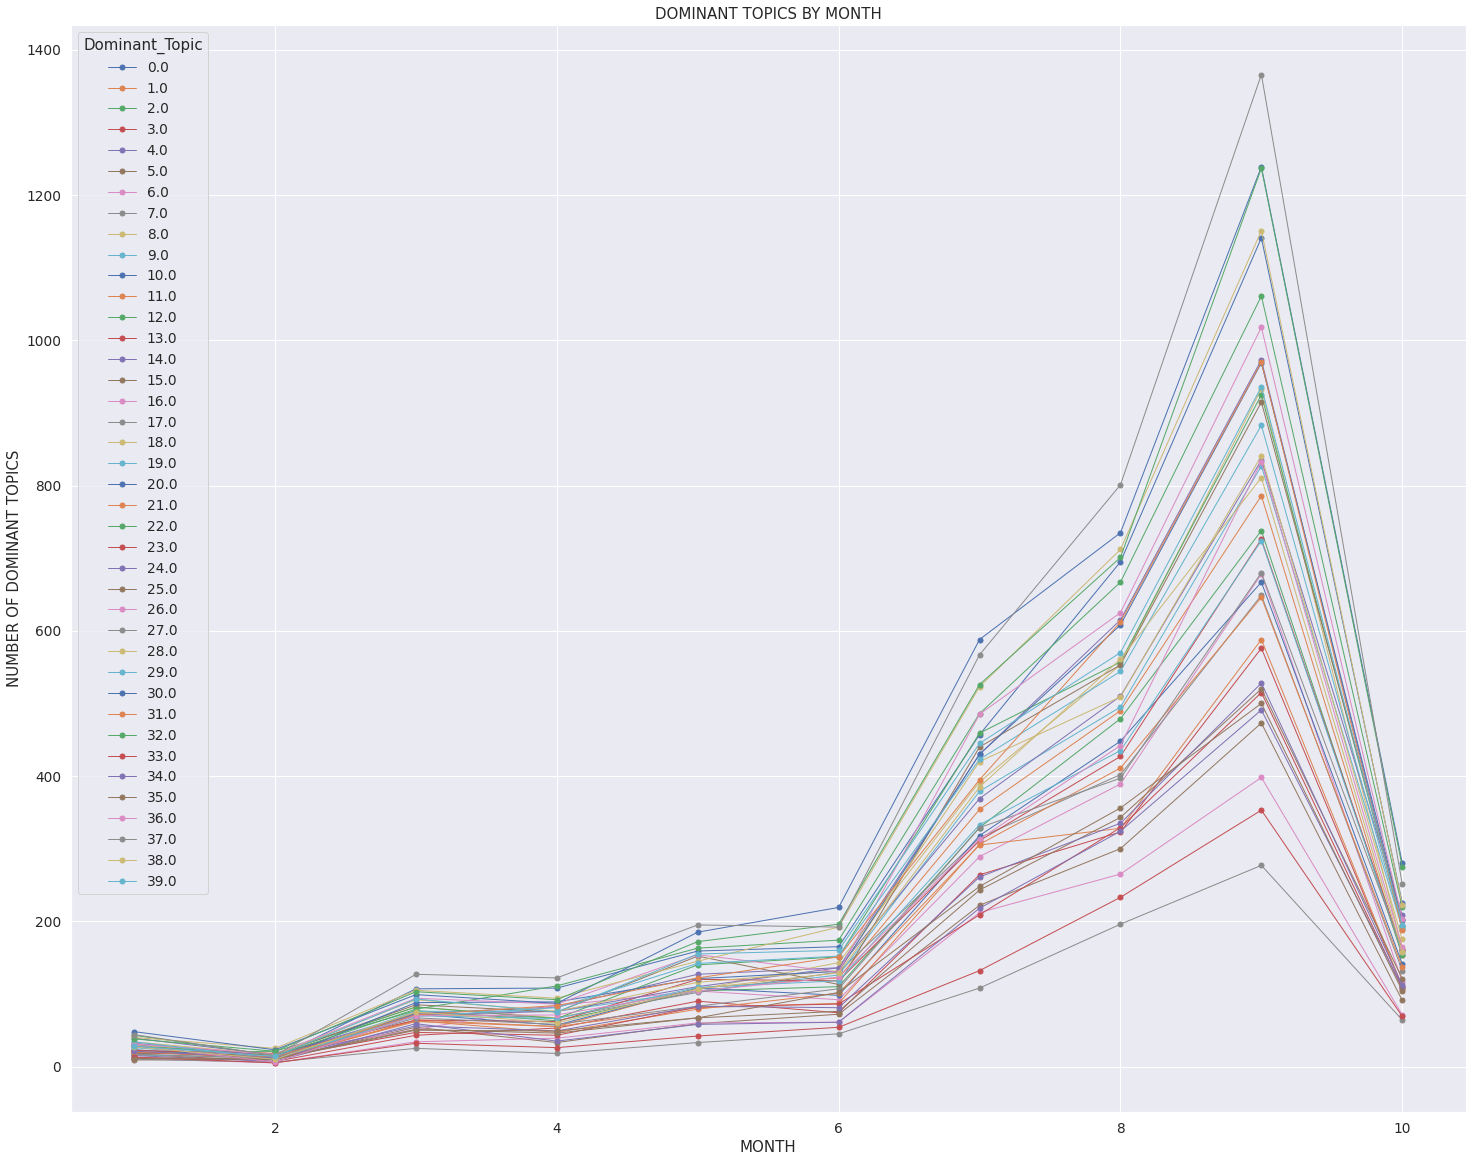

In [ ]:
# plot all hashtags 
fig, ax = plt.subplots(figsize=(25,20))
dfG.groupby(['Dominant_Topic','Tweet_Time']).count()['Counts'].unstack(level=0).plot(ax=ax,marker='o', title ='DOMINANT TOPICS BY MONTH', xlabel ="MONTH", ylabel = 'NUMBER OF DOMINANT TOPICS', linewidth=1, markersize=5)


In [ ]:
#Topics are most mentioned in September
topic30 = lda_model.show_topic(topicid = 30,topn = 30)
topic32 = lda_model.show_topic(topicid = 32,topn = 30)
topic37 = lda_model.show_topic(topicid = 37,topn = 30)
print('Topic 30\n',topic3,'\n')
print('Topic 32\n',topic4,'\n')
print('Topic 37\n',topic6)

Topic 3
 [('response', 0.13384186), ('shame', 0.08375926), ('measures', 0.0672652), ('disaster', 0.06555622), ('governments', 0.055043265), ('tomorrow', 0.05410817), ('failure', 0.050671436), ('freedom', 0.04931426), ('whilst', 0.043827627), ('parents', 0.037697155), ('citizens', 0.036659148), ('residents', 0.033731475), ('anti', 0.03212312), ('info', 0.0308376), ('poll', 0.030180287), ('union', 0.028632665), ('food', 0.027389903), ('brain', 0.023486635), ('shops', 0.018924048), ('toll', 0.018072622), ('levels', 0.016174646), ('pack', 0.015586627), ('policies', 0.015450153), ('july', 0.015207995), ('protesters', 0.013640182), ('lockdown', 0.00015731246), ('victorian', 0.00010334294), ('coronavirus', 7.9964404e-05), ('death', 5.796806e-06), ('premier', 5.0055196e-06)] 

Topic 4
 [('victorians', 0.45813397), ('election', 0.09321299), ('majority', 0.063939095), ('failures', 0.0497657), ('approach', 0.03362703), ('happens', 0.029744776), ('seat', 0.02865763), ('hospitals', 0.025338141), ('

**From Topic Modelling**
*   Health, goverment, premier, Andrews, covid, restrictions, questions, support, deaths, hotel, quarantine, leaderships are some top common words used in the tweets. It can also be considered as the most concern issues of tweeters. These words are also appeared in the top dominant topics.
*   The top three dominant topics indicate that twitters concern about the goverments, elections, needs, helps, hospital, policies and so on. These dominant topics appear more than 1000 times in September which indicates a huge public concern.
*   The peak is also in September.



<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

Based on the findings above, it can be concluded that there are a great number of people support the Victorian Govenment strategy through the hashtag campaigns. However, the increase of Covid-19 cases in July and August increase the number of insecure and opponent people. People start raising their distrusty about the government policies and managements through words.

To cope with this circumstance, four recommendations should be considered.
1. They should review their lockdown and border restrictions with economy concerns. 
2. An investigation should be conducted to find out the purpose of negative people such as checking the authenticity of accounts. An authentic account is from a real person or entity. There maybe interferent information.
3. Victorian Goverment should keep growing the hashtag #IStandWithDan stronger with evidences posted on tweets.
4. Transperant number of cases and supports should be published on Twitter daily with an simple, memorable hashtag. For example, medical support and food support.

### References: 

_List references to other materials that you used for this assignment here_